In [2]:
import os
from dotenv import load_dotenv
from IPython.display import Markdown, display, update_display, Image
from openai import OpenAI
import google.generativeai as genai
import anthropic
import ollama
import gradio as gr

In [3]:
# Load environment variables in a file called .env

load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY", "your-key-if-not-using-env")
os.environ["ANTHROPIC_API_KEY"] = os.getenv(
    "ANTHROPIC_API_KEY", "your-key-if-not-using-env"
)
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY", "your-key-if-not-using-env")

In [41]:
system_message = """
    You are an AI assistant tasked with summarizing articles. Your goal is to provide a concise, accurate, and informative summary of the key points in the given article text. Focus on capturing the main ideas, key findings, and important conclusions. Avoid including unnecessary details or tangents. The summary should be approximately 1-2 paragraphs in length.
    """
prompt = "Please provide a short summary of the article in markdown format."

In [42]:
# Connect to OpenAI, Anthropic and Google

openai = OpenAI()

claude = anthropic.Anthropic()

genai.configure()

In [43]:
# Let's wrap a call to llama3.2 in a function
def summarize_llama(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt},
    ]
    response = ollama.chat(model="llama3.2", messages=messages)
    return response['message']['content']

In [44]:
# Let's wrap a call to GPT-4o-mini in a simple function

def summarize_gpt(prompt=prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt},
    ]
    response = openai.chat.completions.create(
        model="gpt-4o-mini", messages=messages, stream=False
    )
    return response.choices[0].message.content

In [45]:
def summarize_claude(article_text):
    """
    Sends an article to the Anthropic API to generate a summary.
    
    Parameters:
    article_text (str): The full text of the article to be summarized.
    
    Returns:
    str: The summary of the article generated by the Anthropic API.
    """
    try:
        response = claude.messages.create(
            model="claude-3-haiku-20240307",
            max_tokens=1000,
            system = system_message,
            messages = [
                {"role": "user", "content": article_text}
            ]
        )
        return response.content[0].text
    except Exception as e:
        raise Exception(f"Error summarizing article: {e}")

In [46]:
def gemini(prompt=prompt):
    gemini = genai.GenerativeModel(
    model_name='gemini-1.5-flash',
    system_instruction=system_message
    )
    response = gemini.generate_content(prompt)
    return response.candidates[0].content.parts[0].text

In [47]:
import pandas as pd

# Read a sample article from a CSV file
df = pd.read_csv("articles.csv")
df.head()

,article_id,full_text,ABSTRACT
0,PMC11315657,Exploring the association between melatonin an...,Due to the addictive qualities of tobacco prod...
1,PMC11204383,Antibodies Against ZSCAN1 in Pediatric and Adu...,"Objectives, To report the association of zinc ..."
2,PMC11301388,Gingival mesenchymal stem cells: Biological pr...,Our understanding of mesenchymal stem cells (M...
3,PMC11240861,Research progress of DNA methylation in colore...,DNA methylation is one of the earliest and mos...
4,PMC11289611,"Investigating the Relationship of Serum CD163,...","Objective, This study aimed to compare serum l..."


In [48]:
# Select the first article
article = df["full_text"][0]
abstract = df["ABSTRACT"][0]

In [49]:
# Use Ollama to summarize the article
ollama_summary = summarize_llama(article)
print("Ollama Summary:")
display(Markdown(ollama_summary))

Ollama Summary:


The text discusses the complex relationship between melatonin and nicotine dependence, highlighting both the potential benefits of melatonin in reducing nicotine cravings and withdrawal symptoms, as well as the need for further research to fully understand this association.

**Key points:**

1. Melatonin has been shown to reduce nicotine cravings and withdrawal symptoms in some studies.
2. The interplay between melatonin and nicotine dependence involves complex neurobiological, physiological, and behavioral mechanisms.
3. Further research is needed to elucidate the precise mechanisms underlying the interaction between melatonin and nicotine dependence.
4. Novel therapeutic targets within the melatonergic system and circadian clock machinery may lead to more specific and potent interventions for nicotine dependence.
5. Digital health technologies, such as mobile applications, wearable devices, and telemedicine platforms, could enhance the delivery and accessibility of melatonin-based interventions for smoking cessation.

**Research directions:**

1. Investigate the role of melatonin receptors, clock genes, and other components of the circadian system in nicotine addiction.
2. Explore the feasibility and effectiveness of digital health technologies in supporting adherence to melatonin supplementation and monitoring treatment outcomes remotely.
3. Develop personalized treatment plans based on individual genetic markers, age, and circadian rhythms.
4. Conduct subgroup analyses to identify populations that benefit most from melatonin-based interventions.

**Conclusion:**

Understanding the association between melatonin and nicotine dependence has the potential to provide insight into novel therapeutic strategies for managing nicotine addiction and associated sleep disturbances. However, further research is necessary to fully elucidate this complex interaction and develop effective interventions for individuals with nicotine dependence.

In [50]:
# Use OpenAI to summarize the article
openai_response = summarize_gpt(article)
print("OpenAI Summary:")
display(Markdown(openai_response))

OpenAI Summary:


The review article explores the complex relationship between melatonin—known for its role in regulating circadian rhythms—and nicotine dependence, a prevalent addiction that severely impacts public health. Nicotine utilizes the brain's reward pathways to induce addictive behaviors, leading to significant health risks, while melatonin has diverse physiological roles beyond sleep regulation, including antioxidant, neuroprotective, and immunomodulatory properties. Recent preclinical and clinical investigations suggest that melatonin may influence dopamine release, mitigate oxidative stress from nicotine exposure, and potentially alleviate withdrawal symptoms in smokers. This connection has implications for developing innovative strategies to aid smoking cessation, especially for individuals experiencing circadian disruptions.

The review outlines potential therapeutic avenues, such as melatonin supplementation to combat nicotine withdrawal symptoms and improve sleep quality. However, challenges remain, including variability in individual responses to melatonin, optimal dosages, and the need for further research to clarify these mechanisms. Additionally, strategic interventions may combine melatonin with existing therapies like nicotine replacement or behavioral strategies, offering a comprehensive approach to managing nicotine dependency. Future studies should focus on personalized treatment protocols that consider genetic, age, and lifestyle factors to enhance outcomes for individuals struggling with nicotine addiction.

In [51]:
# Use the Anthropic API to summarize the article
anthropic_response = summarize_claude(article)
print("Anthropic Summary:")
display(Markdown(anthropic_response))

Anthropic Summary:


Here is a summary of the key points from the article:

The article explores the potential association between melatonin, a hormone involved in regulating circadian rhythms, and nicotine dependence. Nicotine dependence is a significant public health challenge, contributing to various health issues like cardiovascular disease, respiratory disorders, and cancer. 

Melatonin receptors are widely distributed in the brain, including regions involved in reward pathways and addiction-related behaviors. Preclinical studies suggest melatonin may modulate the reinforcing effects of nicotine, influence dopaminergic neurotransmission, and have antioxidant properties that could protect against nicotine-induced cellular damage.

The article also discusses the potential interplay between melatonin-regulated circadian rhythms and nicotine cravings. Disruptions to circadian rhythms, such as those experienced during shift work, can exacerbate nicotine cravings. Strategies targeting melatonin and circadian rhythms, like melatonin supplementation, may help mitigate nicotine withdrawal symptoms and improve smoking cessation outcomes.

However, the article notes several gaps in current knowledge, such as the need to better understand the specific mechanisms by which melatonin influences nicotine dependence, as well as the impact of individual differences like genetics, age, sex, and comorbidities on the effectiveness of melatonin-based interventions. Further research is warranted to develop tailored, evidence-based strategies for managing nicotine addiction by targeting the melatonergic system.

In [52]:
# Use the Google Generative AI API to summarize the article
gemini_response = gemini(article)
print("Gemini Summary:")
display(Markdown(gemini_response))

Gemini Summary:


This review explores the association between melatonin, a hormone regulating circadian rhythms, and nicotine dependence.  Preclinical research suggests melatonin may modulate nicotine's reinforcing effects by influencing dopaminergic neurotransmission and reducing nicotine-seeking behavior, potentially through its antioxidant and mood-regulating properties.  The review synthesizes existing literature, critically analyzes the evidence, and identifies areas for future research to improve understanding of nicotine addiction and develop innovative cessation strategies.

The review highlights melatonin's diverse physiological roles beyond circadian rhythm regulation, including antioxidant, immunomodulatory, and neuroprotective effects.  It examines the distribution of melatonin receptors in the brain, their involvement in neurotransmitter systems related to addiction (dopaminergic, glutamatergic, GABAergic, serotonergic, and endogenous opioid systems), and the interplay between melatonin-regulated circadian rhythms and nicotine cravings.  The potential of melatonin supplementation, melatonin receptor agonists, chronotherapy, and light therapy in mitigating nicotine withdrawal symptoms and improving smoking cessation outcomes is discussed, along with the need for further research to address methodological challenges and identify personalized treatment strategies based on individual differences in melatonin responsiveness and circadian rhythms.


In [16]:
import evaluate
rouge = evaluate.load("rouge")

## Evaluate the summaries generated by the different models

In [53]:
ollama_scores = rouge.compute(predictions=[ollama_summary], references=[abstract])
print("Ollama Scores:")
print(ollama_scores)

Ollama Scores:
{'rouge1': 0.4575645756457565, 'rouge2': 0.10370370370370371, 'rougeL': 0.18450184501845018, 'rougeLsum': 0.2915129151291513}


In [54]:
openai_scores = rouge.compute(predictions=[openai_response], references=[abstract])
print("OpenAI gemini-1.5-flash Scores:")
print(openai_scores)

OpenAI gemini-1.5-flash Scores:
{'rouge1': 0.43514644351464443, 'rouge2': 0.13865546218487396, 'rougeL': 0.22594142259414227, 'rougeLsum': 0.21757322175732222}


In [55]:
anthropic_scores = rouge.compute(predictions=[anthropic_response], references=[abstract])
print("Anthropic Scores:")
print(anthropic_scores)

Anthropic Scores:
{'rouge1': 0.5080645161290321, 'rouge2': 0.1902834008097166, 'rougeL': 0.25000000000000006, 'rougeLsum': 0.3145161290322581}


In [56]:
genai_scores = rouge.compute(predictions=[gemini_response], references=[abstract])
print("Google Generative AI Scores:")
print(genai_scores)

Google Generative AI Scores:
{'rouge1': 0.46420824295010843, 'rouge2': 0.17429193899782133, 'rougeL': 0.24728850325379612, 'rougeLsum': 0.2603036876355749}


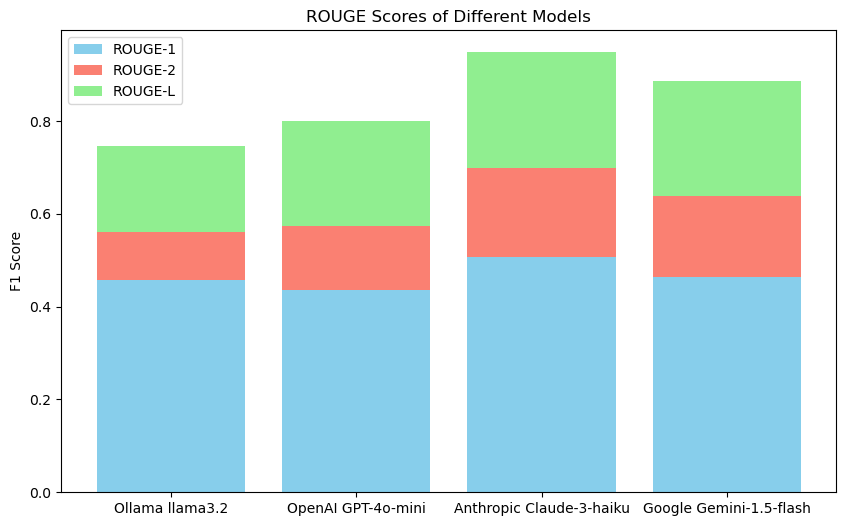

In [57]:
# Create a chart to compare the ROUGE scores of the different models

import matplotlib.pyplot as plt

models = [
    "Ollama llama3.2",
    "OpenAI GPT-4o-mini",
    "Anthropic Claude-3-haiku",
    "Google Gemini-1.5-flash",
]

rouge_1_scores = [
    ollama_scores["rouge1"],
    openai_scores["rouge1"],
    anthropic_scores["rouge1"],
    genai_scores["rouge1"],
]
rouge_2_scores = [
    ollama_scores["rouge2"],
    openai_scores["rouge2"],
    anthropic_scores["rouge2"],
    genai_scores["rouge2"],
]
rouge_l_scores = [
    ollama_scores["rougeL"],
    openai_scores["rougeL"],
    anthropic_scores["rougeL"],
    genai_scores["rougeL"],
]

plt.figure(figsize=(10, 6))

# Stack the bars using variable names for scores
plt.bar(models, rouge_1_scores, color="skyblue", label="ROUGE-1")
plt.bar(models, rouge_2_scores, bottom=rouge_1_scores, color="salmon", label="ROUGE-2")
plt.bar(
    models,
    rouge_l_scores,
    bottom=[i + j for i, j in zip(rouge_1_scores, rouge_2_scores)],
    color="lightgreen",
    label="ROUGE-L",
)

plt.ylabel("F1 Score")
plt.title("ROUGE Scores of Different Models")
plt.legend()
plt.show()

In [58]:
# Create a Gradio interface to summarize articles using the different models

def summarize_article(prompt, model):
    if model == "Ollama":
        return summarize_llama(prompt)
    elif model == "GPT":
        return summarize_gpt(prompt)
    elif model == "Claude":
        return summarize_claude(prompt)
    elif model == "Gemini":
        return gemini(prompt)

In [28]:
view = gr.Interface(
    fn=summarize_article,
    inputs=[
        gr.Textbox(label="Your article:"),
        gr.Dropdown(["Ollama","GPT", "Claude", "Gemini"], label="Select model", value="Ollama"),
    ],
    outputs=[gr.Markdown(label="Summary")],
    flagging_mode="never",
    description="Summarize an article using different models.",
)

view.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2024/11/18 08:56:34 [W] [service.go:132] login to server failed: read tcp 172.16.16.2:64269->44.237.78.176:7000: read: connection reset by peer


## Gradio example input output

In [33]:
Image(url="Gradio_Screenshot.jpg")

### RAG
RAG (Retrieval Augmented Generation) is a technique that enhances the ability of large language models (LLMs) by retrieving relevant information from an external knowledge base and including it in the prompt. This allows the LLM to generate more informed and accurate responses.

Using RAG with an article abstracts should enhance the quality and efficiency of text summarization. It's a great way to leverage existing knowledge and guide the LLM towards generating more accurate and informative summaries.

In [59]:
system_message = """
    You are an AI assistant tasked with summarizing articles. 
    You will be provided with the article's abstract and full text.
    Use the abstract to gain a high-level understanding of the article. 
    Then, based on the full text, provide a concise, accurate, and informative summary of the key points. 
    Focus on capturing the main ideas, key findings, and important conclusions. 
    Avoid including unnecessary details or tangents. 
    The summary should be approximately 1-2 paragraphs in length.
    """

In [ ]:
# Define a function to summarize an article using the Anthropic API with the abstract included (RAG)
def summarize_claude_rag(article_text, abstract):
    """
    Sends an article to the Anthropic API to generate a summary,
    augmented with the article's abstract for improved context.

    Parameters:
    article_text (str): The full text of the article to be summarized.
    abstract (str): The abstract of the article.

    Returns:
    str: The summary of the article generated by the Anthropic API.
    """

    try:
        response = claude.messages.create(
            model="claude-3-haiku-20240307",
            max_tokens=1000,
            system=system_message,
            messages=[
                {
                    "role": "user",
                    "content": f"Abstract: {abstract}\n\nArticle Text: {article_text}",
                }
            ],
        )
        return response.content[0].text
    except Exception as e:
        raise Exception(f"Error summarizing article: {e}")

In [61]:
# summarize the article using the augmented function
claude_rag_response = summarize_claude_rag(article, abstract)

# display the augmented summary
print("Claude RAG Summary:")
display(Markdown(claude_rag_response))

Claude RAG Summary:


Here is a summary of the key points from the article:

The article explores the potential association between melatonin, a hormone involved in regulating circadian rhythms, and nicotine dependence. Nicotine addiction is a major public health concern globally, contributing to numerous acute and chronic medical conditions. 

Melatonin receptors are widely distributed throughout the brain, including areas implicated in reward pathways and addiction-related behaviors. Preclinical studies suggest melatonin may modulate the reinforcing effects of nicotine by influencing neurotransmitter systems like dopamine, glutamate, GABA and serotonin. Melatonin's antioxidant properties may also mitigate the oxidative stress from chronic nicotine exposure.

The article further discusses the interplay between melatonin-regulated circadian rhythms and nicotine cravings. Disruptions in circadian rhythms can exacerbate nicotine cravings and increase vulnerability to addiction. Chronotherapeutic approaches targeting melatonin signaling show promise for smoking cessation by alleviating withdrawal symptoms. 

However, key gaps remain in understanding the precise mechanisms linking melatonin and nicotine addiction, as well as optimizing therapeutic interventions. Factors like genetics, age, sex and comorbidities can influence individual responses to melatonin treatment. Methodological challenges in measuring melatonin levels and nicotine exposure also complicate research in this area.

The article concludes that further research is needed to elucidate the complex interplay between melatonin and nicotine dependence, with the goal of developing more effective, personalized treatment strategies for managing this devastating addiction.

In [62]:
# evaluate the augmented summary using ROUGE
claude_rag_scores = rouge.compute(predictions=[claude_rag_response], references=[abstract])
print("Claude(anthropic) Score:")
print(anthropic_scores)
print()
print("Claude RAG Scores:")
print(claude_rag_scores)

Claude(anthropic) Score:
{'rouge1': 0.5080645161290321, 'rouge2': 0.1902834008097166, 'rougeL': 0.25000000000000006, 'rougeLsum': 0.3145161290322581}

Claude RAG Scores:
{'rouge1': 0.5411764705882353, 'rouge2': 0.2204724409448819, 'rougeL': 0.2784313725490197, 'rougeLsum': 0.32156862745098036}


In [64]:
# Define a function to summarize an article using the Ollama AI API with the abstract included (RAG)
def summarize_llama_rag(article_text, abstract):
    """
    Sends an article to the Ollama API to generate a summary, 
    augmented with the article's abstract for improved context.
    
    Parameters:
    article_text (str): The full text of the article to be summarized.
    abstract (str): The abstract of the article.

    Returns:
    str: The summary of the article generated by the Ollama API.
    """

    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": f"Abstract: {abstract}\n\nArticle Text: {article_text}"},
    ]
    
    try:
        response = ollama.chat(model="llama3.2", messages=messages)
        return response['message']['content']
    except Exception as e:
        raise Exception(f"Error summarizing article: {e}")

In [67]:
# summarize the article using the augmented function
ollama_rag_response = summarize_llama_rag(article, abstract)

# display the augmented summary
print("Ollama RAG Summary:")
display(Markdown(ollama_rag_response))

Ollama RAG Summary:


This document outlines a comprehensive review of the relationship between melatonin and nicotine dependence, highlighting both the existing body of knowledge and areas where future research directions are needed.

**Key Findings:**

1.  Melatonin levels vary throughout the day, peaking at night, which may contribute to its potential impact on nicotine dependence.
2.  Individuals with nicotine dependence often experience sleep disturbances, which can exacerbate withdrawal symptoms.
3.  Research suggests that melatonin supplementation may help alleviate nicotine withdrawal symptoms in some individuals.

**Future Directions:**

1.  Identifying novel therapeutic targets within the melatonergic system and circadian clock machinery could lead to more specific and potent interventions for nicotine dependence.
2.  Leveraging digital health technologies, such as mobile applications, wearable devices, and telemedicine platforms, could enhance the delivery and accessibility of melatonin-based interventions for smoking cessation.

**Implications:**

1.  A better understanding of the interplay between melatonin and nicotine dependence can inform the development of novel therapeutic strategies for managing nicotine addiction.
2.  The potential benefits of melatonin supplementation in alleviating nicotine withdrawal symptoms could be significant, particularly when combined with other evidence-based interventions such as cognitive-behavioral therapy (CBT) or nicotine replacement therapy (NRT).

**Limitations:**

1.  Many studies investigating the relationship between melatonin and nicotine dependence have small sample sizes or are conducted in controlled laboratory settings.
2.  The long-term effects of melatonin supplementation on nicotine dependence remain unclear, and further research is needed to determine its safety and efficacy in this context.

By addressing these limitations and exploring new avenues for research, scientists can gain a deeper understanding of the complex interplay between melatonin and nicotine dependence, ultimately leading to the development of more effective interventions for managing nicotine addiction.

In [68]:
# evaluate the augmented summary using ROUGE
ollama_rag_scores = rouge.compute(predictions=[ollama_rag_response], references=[abstract])
print("Ollama Scores:")
print(ollama_scores)

print()
print("Ollama RAG Scores:")
print(ollama_rag_scores)

Ollama Scores:
{'rouge1': 0.4575645756457565, 'rouge2': 0.10370370370370371, 'rougeL': 0.18450184501845018, 'rougeLsum': 0.2915129151291513}

Ollama RAG Scores:
{'rouge1': 0.3802816901408451, 'rouge2': 0.08127208480565369, 'rougeL': 0.17253521126760563, 'rougeLsum': 0.23943661971830987}


In [70]:
# Define a function to summarize an article using the OpenAI API with the abstract included (RAG)
def summarize_gpt_rag(article_text, abstract):
    """
    Sends an article to the OpenAI API to generate a summary, 
    augmented with the article's abstract for improved context.
    
    Parameters:
    article_text (str): The full text of the article to be summarized.
    abstract (str): The abstract of the article.

    Returns:
    str: The summary of the article generated by the OpenAI API.
    """
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": f"Abstract: {abstract}\n\nArticle Text: {article_text}"},
    ]
    
    try:
        response = openai.chat.completions.create(
            model="gpt-4-1106-preview", 
            messages=messages, 
            stream=False
        )
        return response.choices[0].message.content
    except Exception as e:
        raise Exception(f"Error summarizing article: {e}")

In [71]:
# summarize the article using the augmented function
gpt_rag_response = summarize_gpt_rag(article, abstract)

# display the augmented summary
print("GPT RAG Summary:")
display(Markdown(gpt_rag_response))

GPT RAG Summary:


The article reviews the relationship between melatonin, a hormone primarily involved in regulating circadian rhythms, and nicotine dependence, highlighting the hormone's potential therapeutic role in addiction and psychiatric conditions. Nicotine addiction, despite known health risks, continues to be a major public health issue due to its ability to stimulate the brain's reward pathways and induce pleasure. Melatonin has been shown to influence these reward pathways, with a presence in areas of the brain implicated in addiction, suggesting it may modulate the reinforcing effects of nicotine and reduce nicotine-seeking behavior. Its antioxidant properties also offer protection against the cellular damage caused by chronic nicotine exposure.

The review underscores the necessity for more research to understand the molecular mechanisms of melatonin's role in nicotine addiction, as well as to determine the optimal dosing and therapeutic approaches. Challenges include individual responses to melatonin, which can be influenced by genetic factors, age, and sex. Preclinical studies suggest that melatonin could reduce withdrawal symptoms and cravings, potentially aiding in smoking cessation. Clinical trials indicate melatonin supplementation could be beneficial in reducing withdrawal symptoms and improving sleep quality during smoking cessation. In light of these findings, future research is essential for developing effective, personalized treatments involving melatonin for those struggling with nicotine dependence. It is also critical to consider the methodological challenges in studying the relationship between melatonin and nicotine, including measuring melatonin levels and nicotine exposure, accounting for circadian rhythms, and controlling for confounding variables. Generlizability of findings and the design of clinical trials present additional complexities that need to be addressed. Novel therapeutic targets and the use of digital health interventions to enhance treatment adherence and outcomes are promising future research directions.

In [72]:
# evaluate the augmented summary using ROUGE
gpt_rag_scores = rouge.compute(predictions=[gpt_rag_response], references=[abstract])
print("GPT Scores:")
print(openai_scores)
print()
print("GPT RAG Scores:")
print(gpt_rag_scores)

GPT Scores:
{'rouge1': 0.43514644351464443, 'rouge2': 0.13865546218487396, 'rougeL': 0.22594142259414227, 'rougeLsum': 0.21757322175732222}

GPT RAG Scores:
{'rouge1': 0.5578947368421052, 'rouge2': 0.2007042253521127, 'rougeL': 0.24912280701754386, 'rougeLsum': 0.24561403508771928}


In [73]:
# Define a function to summarize an article using the Google Generative AI API with the abstract included (RAG)
def gemini_rag(article_text, abstract):
    """
    Sends an article to the Gemini API to generate a summary, 
    augmented with the article's abstract for improved context.
    
    Parameters:
    article_text (str): The full text of the article to be summarized.
    abstract (str): The abstract of the article.

    Returns:
    str: The summary of the article generated by the Gemini API.
    """
    
    system_message = """
    You are an AI assistant tasked with summarizing articles. 
    You will be provided with the article's abstract and full text.
    Use the abstract to gain a high-level understanding of the article. 
    Then, based on the full text, provide a concise, accurate, and informative summary of the key points. 
    Focus on capturing the main ideas, key findings, and important conclusions. 
    Avoid including unnecessary details or tangents. 
    The summary should be approximately 1-2 paragraphs in length.
    """
    
    prompt = f"Abstract: {abstract}\n\nArticle Text: {article_text}"
    
    try:
        gemini = genai.GenerativeModel(
            model_name='gemini-1.5-flash',
            system_instruction=system_message
        )
        response = gemini.generate_content(prompt)
        return response.candidates[0].content.parts[0].text
    except Exception as e:
        raise Exception(f"Error summarizing article: {e}")

In [74]:
# summarize the article using the augmented function
gemini_rag_response = gemini_rag(article, abstract)

# display the augmented summary
print("Gemini RAG Summary:")
display(Markdown(gemini_rag_response))

Gemini RAG Summary:


This review explores the relationship between melatonin, the "hormone of darkness" regulating circadian rhythms, and nicotine dependence.  Nicotine addiction, a significant global health concern, activates the brain's reward pathways, leading to compulsive cravings and various health problems.  Emerging research suggests melatonin, with its diverse physiological roles including antioxidant, immunomodulatory, and neuroprotective properties, may interact with nicotine dependence.  Preclinical studies indicate melatonin's potential to modulate nicotine's reinforcing effects by influencing dopaminergic neurotransmission and attenuating nicotine-seeking behavior.  Furthermore, melatonin's antioxidant properties could mitigate nicotine-induced oxidative stress.


The review highlights melatonin's influence on various neurotransmitter systems involved in addiction, such as dopaminergic, glutamatergic, serotonergic, and endogenous opioid systems.  Disruptions in melatonin signaling, often linked to circadian rhythm disturbances, may exacerbate nicotine cravings and withdrawal symptoms.  Chronotherapeutic approaches, including timed melatonin supplementation during periods of heightened cravings, show promise in smoking cessation interventions.  However, further research is needed to optimize therapeutic interventions, considering individual variability in melatonin response, optimal dosing regimens, and the identification of biomarkers for treatment response.  This research should also explore the specific molecular mechanisms underlying the melatonin-nicotine interaction and address methodological challenges in studying this complex relationship.


In [75]:
# evaluate the augmented summary using ROUGE
gemini_rag_scores = rouge.compute(predictions=[gemini_rag_response], references=[abstract])
print("Gemini Scores:")
print(genai_scores)
print()
print("Gemini RAG Scores:")
print(gemini_rag_scores)

Gemini Scores:
{'rouge1': 0.46420824295010843, 'rouge2': 0.17429193899782133, 'rougeL': 0.24728850325379612, 'rougeLsum': 0.2603036876355749}

Gemini RAG Scores:
{'rouge1': 0.5507246376811594, 'rouge2': 0.2577962577962578, 'rougeL': 0.3064182194616977, 'rougeLsum': 0.2981366459627329}


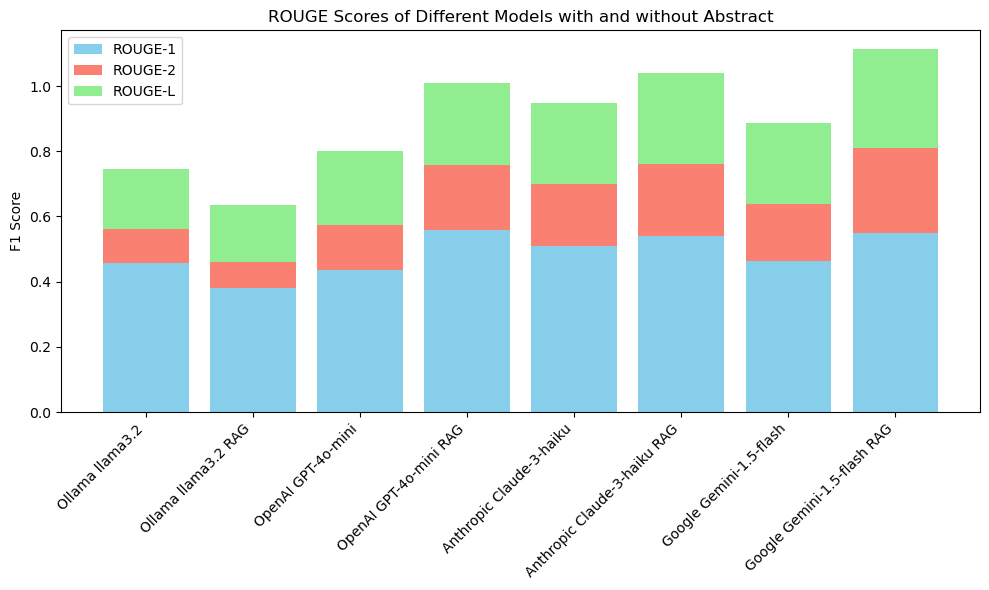

In [76]:
# Create a chart to compare the ROUGE scores of the different models with and without the abstract

models = [
    "Ollama llama3.2",
    "Ollama llama3.2 RAG",
    "OpenAI GPT-4o-mini",
    "OpenAI GPT-4o-mini RAG",
    "Anthropic Claude-3-haiku",
    "Anthropic Claude-3-haiku RAG",
    "Google Gemini-1.5-flash",
    "Google Gemini-1.5-flash RAG",
]

rouge_1_scores = [
    ollama_scores["rouge1"],
    ollama_rag_scores["rouge1"],
    openai_scores["rouge1"],
    gpt_rag_scores["rouge1"],
    anthropic_scores["rouge1"],
    claude_rag_scores["rouge1"],
    genai_scores["rouge1"],
    gemini_rag_scores["rouge1"],
]

rouge_2_scores = [
    ollama_scores["rouge2"],
    ollama_rag_scores["rouge2"],
    openai_scores["rouge2"],
    gpt_rag_scores["rouge2"],
    anthropic_scores["rouge2"],
    claude_rag_scores["rouge2"],
    genai_scores["rouge2"],
    gemini_rag_scores["rouge2"],
]

rouge_l_scores = [
    ollama_scores["rougeL"],
    ollama_rag_scores["rougeL"],
    openai_scores["rougeL"],
    gpt_rag_scores["rougeL"],
    anthropic_scores["rougeL"],
    claude_rag_scores["rougeL"],
    genai_scores["rougeL"],
    gemini_rag_scores["rougeL"],
]

plt.figure(figsize=(10, 6))

# Stack the bars using variable names for scores
plt.bar(models, rouge_1_scores, color="skyblue", label="ROUGE-1")
plt.bar(models, rouge_2_scores, bottom=rouge_1_scores, color="salmon", label="ROUGE-2")
plt.bar(
    models,
    rouge_l_scores,
    bottom=[i + j for i, j in zip(rouge_1_scores, rouge_2_scores)],
    color="lightgreen",
    label="ROUGE-L",
)

plt.ylabel("F1 Score")
plt.title("ROUGE Scores of Different Models with and without Abstract")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Impact of RAG on Summarization Performance

The chart clearly demonstrates the positive impact of incorporating **RAG (Retrieval Augmented Generation)** across all tested language models (Ollama, OpenAI GPT, Anthropic Claude, and Google Gemini).

### Key Observations:

* **Consistent Improvement:** Adding RAG consistently boosts performance across all models and ROUGE metrics (ROUGE-1, ROUGE-2, ROUGE-L). This indicates that providing context in the form of an abstract significantly aids in generating more accurate and informative summaries.

* **Most Significant Gains:** The largest improvements are seen in ROUGE-2 scores, which measure the overlap of bigrams (two-word sequences) between the generated summary and the reference summary. This suggests that RAG helps models better capture the relationships between words and concepts, leading to a deeper understanding of the text.

* **Model Variations:** While all models benefit from RAG, the extent of improvement varies. This highlights the differences in architectures and training data across these models.

### Conclusion

Overall, the chart provides strong evidence that RAG is a valuable technique for enhancing the summarization capabilities of large language models. By grounding the models in relevant context, RAG leads to more accurate, informative, and coherent summaries.

## RAG improvements with sentence embeddings

Benefits of using sentence embeddings:
- Focused Context: By using sentence embeddings and similarity search, the RAG approach provides the model with the most relevant sentences from the article, rather than the entire text. This focused context helps the model better understand the key aspects of the article.
- Providing only the relevant context reduces the noise and irrelevant information that the model needs to process, allowing it to focus on the essential parts for summarization.

In [82]:
from sentence_transformers import SentenceTransformer, util
import faiss
import nltk

In [ ]:
def summarize_with_rag(article_text, abstract, model_function):
  """
  Generates a summary of an article using RAG.

  Args:
      article_text (str): The full text of the article.
      abstract (str): The abstract of the article.
      model_function (function): The function for generating text with a chosen LLM. 
                                 Should take a single string (prompt) as input and return a string (summary).

  Returns:
      str: The generated summary.
  """

  # Split the article text into sentences
  nltk.download('punkt') 
  sentences = nltk.sent_tokenize(article_text)

  # Embed the sentences and abstract
  model = SentenceTransformer('all-mpnet-base-v2')
  sentence_embeddings = model.encode(sentences, convert_to_tensor=True)
  abstract_embedding = model.encode(abstract, convert_to_tensor=True)

  # Move tensors to CPU 
  sentence_embeddings = sentence_embeddings.cpu()
  abstract_embedding = abstract_embedding.cpu()

  # Find the most similar sentences in the article to the abstract
  index = faiss.IndexFlatL2(sentence_embeddings.shape[1]) 
  index.add(sentence_embeddings)
  D, I = index.search(abstract_embedding.reshape(1, -1), 5)  # Find the top 5 most similar sentences

  # Extract the most similar sentences
  similar_sentences = [sentences[i] for i in I[0]] 

  # Construct the prompt with the similar sentences and abstract
  prompt = f"Abstract: {abstract}\n\nRelevant context from the article:\n\n"
  prompt += "\n".join(similar_sentences) + "\n\nSummarize the article based on the abstract and the provided context:"

  # Generate the summary using the provided model function
  summary = model_function(prompt)

  return summary

In [89]:
def generate_with_llama(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt},
    ]
    response = ollama.chat(model="llama3.2", messages=messages)
    return response['message']['content']

In [ ]:
# Generate a summary using RAG with Ollama
ollama_rag_summary = summarize_with_rag(article, abstract, generate_with_llama)

print("Ollama RAG Summary:")
display(Markdown(ollama_rag_summary))

[nltk_data] Downloading package punkt to /Users/stanlouis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ollama RAG Summary:


Here is a concise summary of the article:

Nicotine dependence remains a significant public health concern due to its addictive qualities and associated health risks, including cardiovascular disease, respiratory disorders, and cancer. Research has implicated melatonin, known as the 'hormone of darkness', in modulating nicotine-seeking behavior, attenuating oxidative stress, and potentially mitigating the effects of nicotine exposure on cellular damage. Melatonin receptors are found throughout the brain, influencing dopaminergic neurotransmission and regulating circadian rhythms. Studies suggest that melatonin supplementation during periods of heightened nicotine cravings may alleviate withdrawal symptoms and reduce the reinforcing effects of nicotine.

Future research directions aim to explore the intricate interplay between melatonin and nicotine, with a focus on identifying novel therapeutic targets within the melatonergic system and circadian clock machinery. The potential benefits of melatonin in modulating reward processing, attenuating drug-induced hyperactivity, and reducing opioid withdrawal symptoms are promising. However, further research is required to elucidate the molecular pathways and neural circuits involved in the effects of melatonin on nicotine dependence, as well as to optimize dosing regimens and identify biomarkers of treatment response.

In [91]:
# Evaluate the Ollama RAG summary using ROUGE
ollama_embedding_rag_scores = rouge.compute(predictions=[ollama_rag_summary], references=[abstract])
print("Ollama Scores:")
print(ollama_scores)
print("Ollama RAG Scores with sentence Embeddings:")
print(ollama_embedding_rag_scores)


Ollama Scores:
{'rouge1': 0.4575645756457565, 'rouge2': 0.10370370370370371, 'rougeL': 0.18450184501845018, 'rougeLsum': 0.2915129151291513}
Ollama RAG Scores with sentence Embeddings:
{'rouge1': 0.5970149253731343, 'rouge2': 0.35974304068522484, 'rougeL': 0.35820895522388063, 'rougeLsum': 0.43070362473347545}


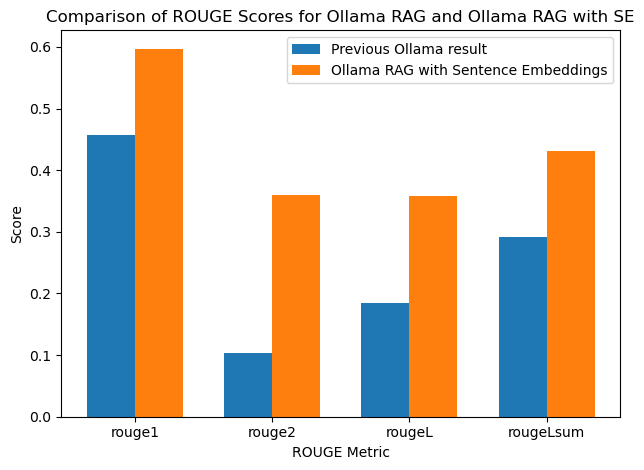

In [101]:
# Visualize the ROUGE scores of the Ollama model with and without sentence embeddings
import numpy as np

# Extract metrics and scores for plotting
metrics = list(ollama_scores.keys())
ollama_values = list(ollama_scores.values())
ollama_rag_values = list(ollama_rag_scores.values())

# Set up the bar chart
bar_width = 0.35
index = np.arange(len(metrics))

fig, ax = plt.subplots()
rects1 = ax.bar(index, ollama_values, bar_width, label='Previous Ollama result')
rects2 = ax.bar(index + bar_width, ollama_rag_values, bar_width, label='Ollama RAG with Sentence Embeddings')

# Add labels, title, and legend
ax.set_xlabel('ROUGE Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of ROUGE Scores for Ollama RAG and Ollama RAG with SE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

The results above clearly demonstrate the effectiveness of RAG with sentence embeddings in enhancing the summarization capabilities of the Ollama model. This approach in this case leads to significant improvements in the quality and informativeness of the generated summaries.

### Prompt Importance

Crafting an effective prompt is **crucial** for an optimized response. It guides the LLM to:

* **Connect the Abstract and Context:**  A well-crafted prompt explicitly instructs the LLM to use both the abstract and the retrieved context to generate the summary.
* **Focus on Key Information:** It helps the LLM prioritize the most important information from the context and align it with the abstract's key takeaways.
* **Maintain Coherence:** A good prompt encourages the LLM to generate a coherent and well-structured summary that accurately reflects the article's core message.

**In essence, the prompt acts as a bridge between the retrieved knowledge and the desired output, shaping the LLM's understanding and response.**

## To do: Fine-tuning LLM for our use case